# Disease vs Healthy Data Visualization
---
This notebook embeds gene expression data into two dimensions using UMAP in order to visualize which samples are similar to each other. More specifically, we want to know how similar gene expression is between studies, and how similar it is between healthy and disease samples from the same study.

In [1]:
import numpy
import pandas
import plotnine
from plotnine import *
import umap

plotnine.options.figure_size = (8,6)

## Load and prepare data

In [2]:
disease_df = pandas.read_csv('../data/classifier_disease.tsv', sep='\t')
healthy_df = pandas.read_csv('../data/classifier_healthy.tsv', sep='\t')

In [3]:
# Remove genes not used by PLIER/the classifier

plier_df = pandas.read_csv('../data/plier_out/plier_10_Z.tsv', sep='\t')
disease_df = disease_df[disease_df.index.isin(plier_df.index)]
healthy_df = healthy_df[healthy_df.index.isin(plier_df.index)]

In [4]:
reducer = umap.UMAP(random_state = 42)
disease_embedded = reducer.fit_transform(disease_df.T)
healthy_embedded = reducer.fit_transform(healthy_df.T)

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 8 separate connected components using meta-embedding (experimental)
  n_components
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


In [5]:
def create_df_from_embedded_data(embedded_data, source_df):
    embedded_df = pandas.DataFrame({'umap_1': embedded_data[:,0], 'umap_2': embedded_data[:,1]})
    embedded_df['sample'] = source_df.columns
    split = embedded_df['sample'].str.split('.', expand=True)
    embedded_df['sample_id_only'] = split[1]
    embedded_df['study'] = split[0]
    return embedded_df

In [6]:
embedded_disease_df = create_df_from_embedded_data(disease_embedded, disease_df)
embedded_healthy_df = create_df_from_embedded_data(healthy_embedded, healthy_df)
embedded_healthy_df.head()

,umap_1,umap_2,sample,sample_id_only,study
0,18.976660,-1.884925,SRP025982.SRR1216040,SRR1216040,SRP025982
1,18.978716,-1.884623,SRP025982.SRR1216041,SRR1216041,SRP025982
2,18.889576,-1.982818,SRP025982.SRR1216039,SRR1216039,SRP025982
3,18.961931,-1.903350,SRP025982.SRR1216044,SRR1216044,SRP025982
4,18.979422,-1.885280,SRP025982.SRR1216043,SRR1216043,SRP025982


In [7]:
# SRP048759 looks like it is scattered across the embedded space, so let's plot it to see what it looks like
embedded_disease_df['is_SRP048759'] = embedded_disease_df['study'] == 'SRP048759'

## Plot healthy and disease dataframe in UMAP embedded space

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


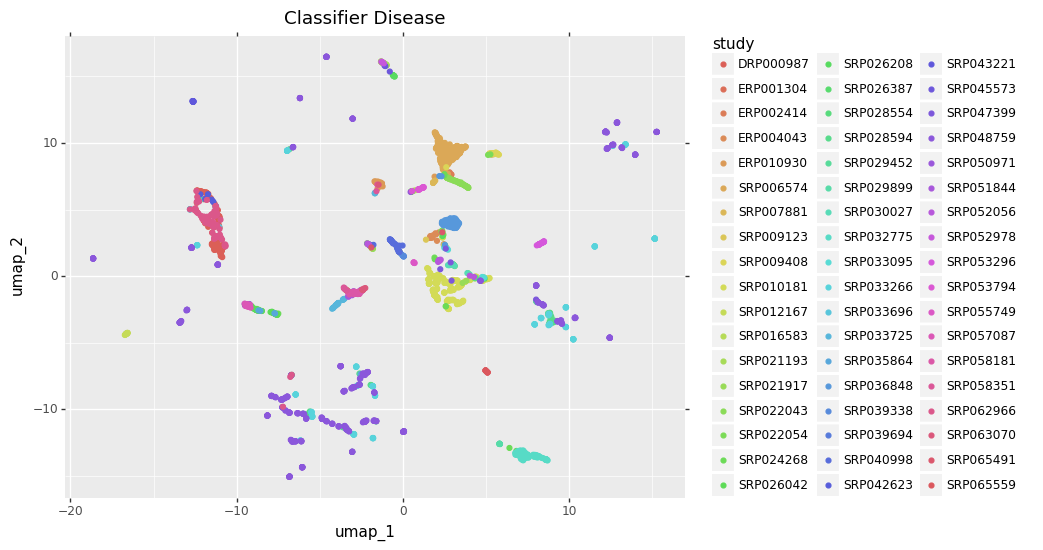

<ggplot: (8790296742348)>

In [8]:
ggplot(embedded_disease_df, aes(x='umap_1', y='umap_2', color='study')) +\
geom_point() +\
ggtitle('Classifier Disease')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


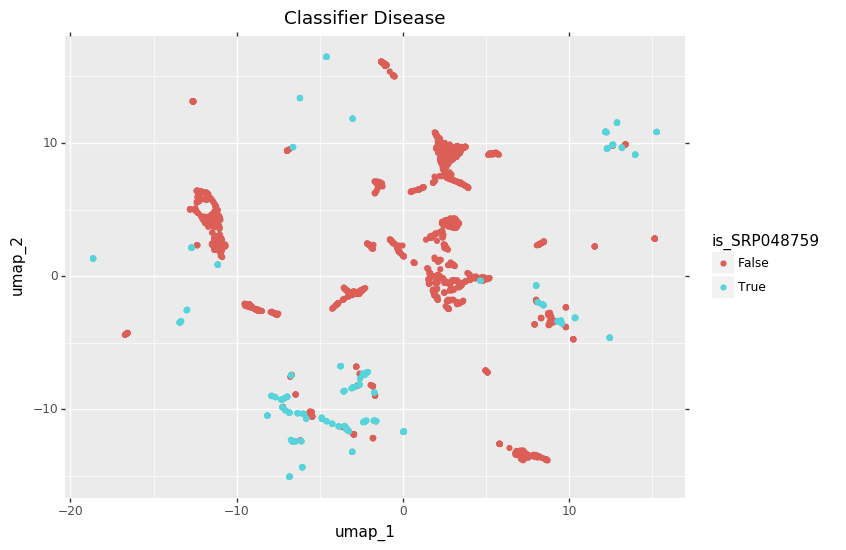

<ggplot: (8790301177934)>

In [9]:
ggplot(embedded_disease_df, aes(x='umap_1', y='umap_2', color='is_SRP048759', label='study')) +\
geom_point() +\
ggtitle('Classifier Disease')

In [10]:
# SRP025982 and SRP026126 look like they are scattered across the embedded space, 
# so let's plot them to see what they look like
embedded_healthy_df['is_SRP025982'] = embedded_healthy_df['study'] == 'SRP025982'
embedded_healthy_df['is_SRP026126'] = embedded_healthy_df['study'] == 'SRP026126'

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


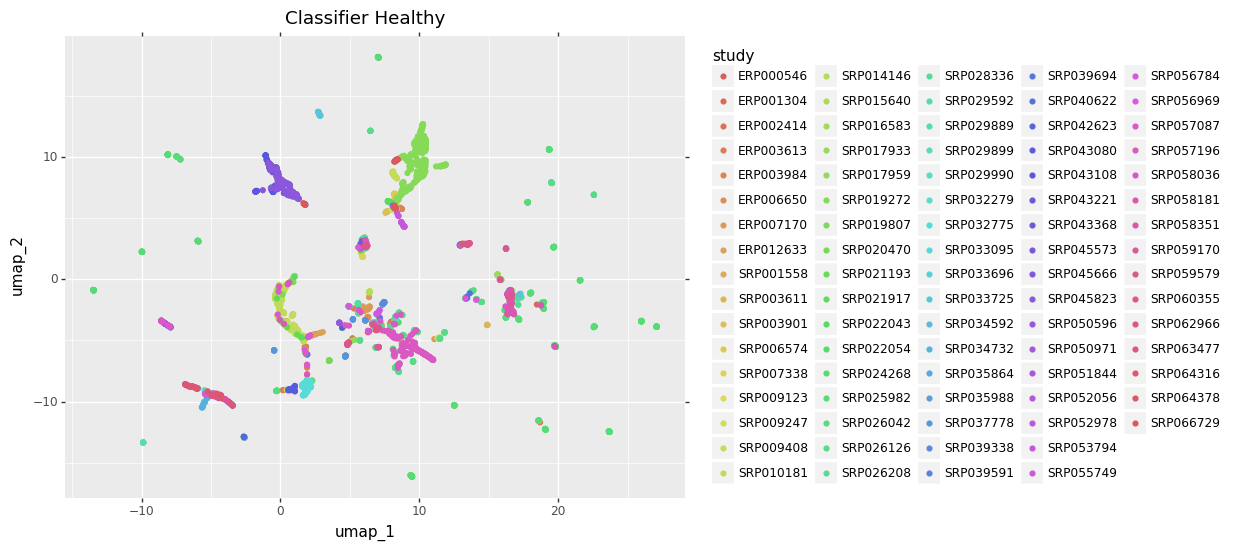

<ggplot: (-9223363246558243524)>

In [11]:
ggplot(embedded_healthy_df, aes(x='umap_1', y='umap_2', color='study')) +\
geom_point() +\
ggtitle('Classifier Healthy')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


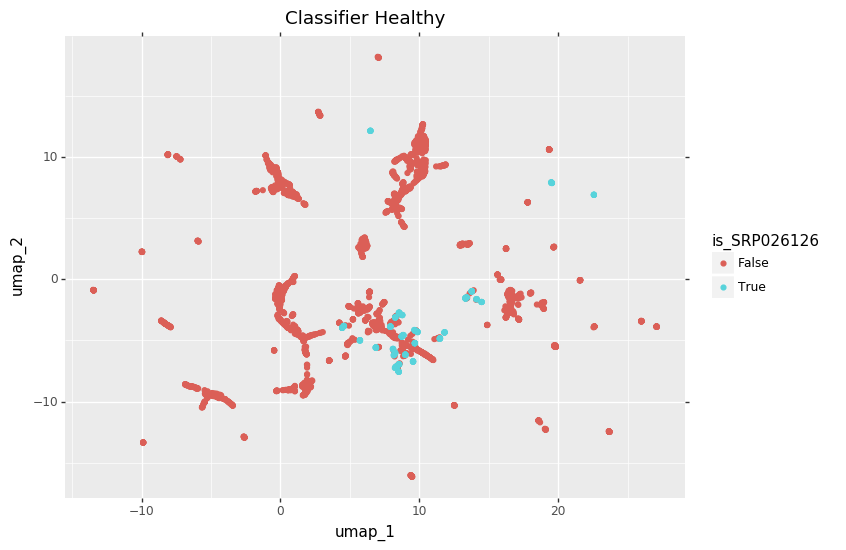

<ggplot: (-9223363246558726347)>

In [12]:
ggplot(embedded_healthy_df, aes(x='umap_1', y='umap_2', color='is_SRP026126')) +\
geom_point() +\
ggtitle('Classifier Healthy')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


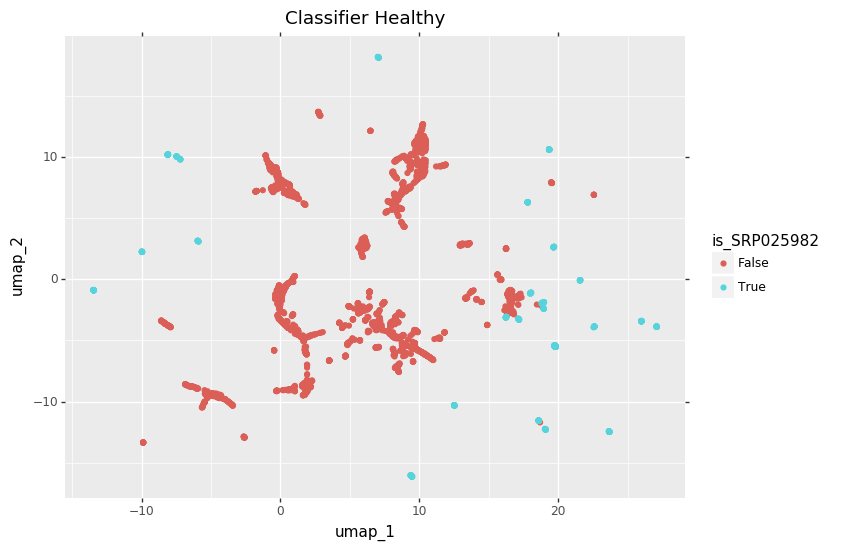

<ggplot: (-9223363246558470221)>

In [13]:
ggplot(embedded_healthy_df, aes(x='umap_1', y='umap_2', color='is_SRP025982')) +\
geom_point() +\
ggtitle('Classifier Healthy')

### Conclusions:
There are large differences in gene expression between studies, while individual studies tend to cluster together. In the healthy image, you can see green dots from the same study all over the embedded space. These belong to [SRP025982](https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP025982) and [SRP026126](https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP026126), both of which are sequencing quality control studies. As they are trying different gene sets and platforms, you would expect their data to be all over the map.

On the other hand, the samples that are spread all over in the disease set belong to [SRP048759](https://trace.ncbi.nlm.nih.gov/Traces/sra/?study=SRP048759), which is a leukemia sequencing study

## Plot healthy and disease data together

In [14]:
combined_df = healthy_df.join(disease_df)
combined_df.iloc[:5,:5]

,SRP025982.SRR1216040,SRP025982.SRR1216041,SRP025982.SRR1216039,SRP025982.SRR1216044,SRP025982.SRR1216043
DPM1,16.983201,19.615461,18.175075,19.699167,14.981941
FGR,1.814602,1.700771,1.849479,1.406663,1.385277
CFH,2.289309,2.495902,1.893213,2.254976,2.138248
GCLC,4.727679,4.616686,4.856081,4.560856,4.452729
NFYA,4.983873,5.068201,5.762101,5.328563,5.305561


In [15]:
combined_embedded = reducer.fit_transform(combined_df.T)

embedded_combined_df = create_df_from_embedded_data(combined_embedded, combined_df)

embedded_combined_df['not_healthy'] = embedded_combined_df['sample'].isin(disease_df.columns)
embedded_combined_df.head()

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/brdnet/lib/py

,umap_1,umap_2,sample,sample_id_only,study,not_healthy
0,-1.625920,6.205082,SRP025982.SRR1216040,SRR1216040,SRP025982,False
1,-1.625678,6.197544,SRP025982.SRR1216041,SRR1216041,SRP025982,False
2,-1.562469,6.208106,SRP025982.SRR1216039,SRR1216039,SRP025982,False
3,-1.628426,6.203341,SRP025982.SRR1216044,SRR1216044,SRP025982,False
4,-1.603098,6.180409,SRP025982.SRR1216043,SRR1216043,SRP025982,False


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


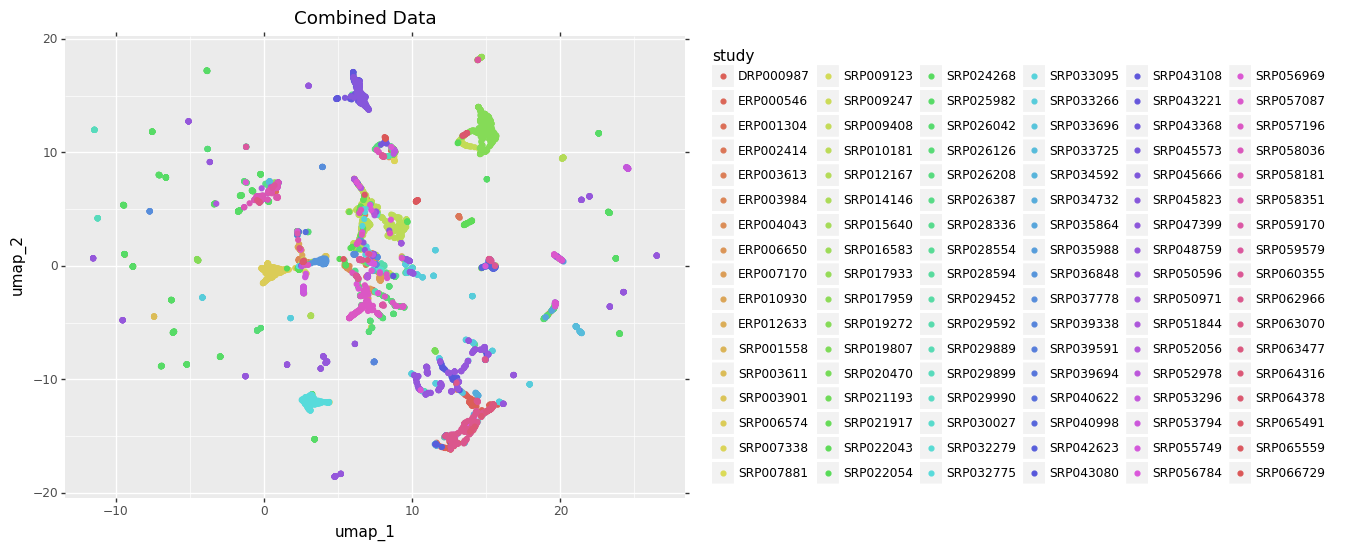

<ggplot: (-9223363246559689272)>

In [16]:
ggplot(embedded_combined_df, aes(x='umap_1', y='umap_2', color='study')) +\
geom_point() +\
ggtitle('Combined Data')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


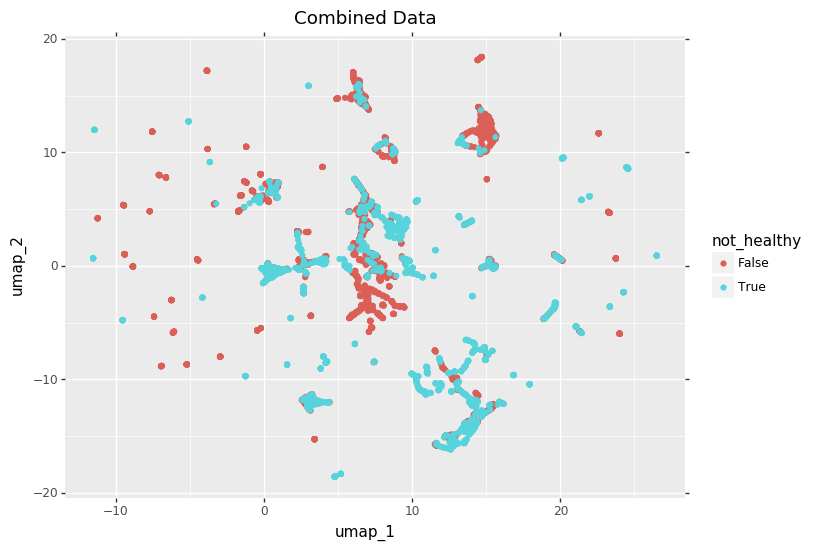

<ggplot: (-9223363246553908220)>

In [17]:
ggplot(embedded_combined_df, aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('Combined Data')

## Plot only studies that have both healthy and unhealthy samples

In [18]:
# Remove studies that don't have both healthy and disease samples
study_stats = embedded_combined_df.groupby('study')['not_healthy'].agg(['sum', 'count'])
print(len(study_stats.index))
two_type_studies = study_stats[(study_stats['sum'] != 0) & (study_stats['sum'] != study_stats['count'])].index
print(len(two_type_studies))

two_type_df = embedded_combined_df[embedded_combined_df['study'].isin(two_type_studies)]
print(len(two_type_df.study.unique()))

102
35
35


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


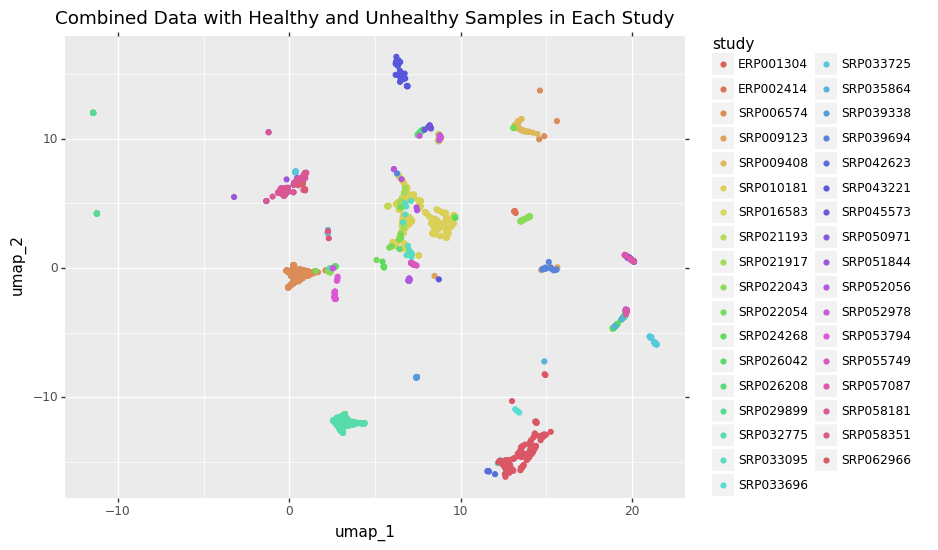

<ggplot: (8790296661231)>

In [19]:
ggplot(two_type_df, aes(x='umap_1', y='umap_2', color='study')) +\
geom_point() +\
ggtitle('Combined Data with Healthy and Unhealthy Samples in Each Study')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


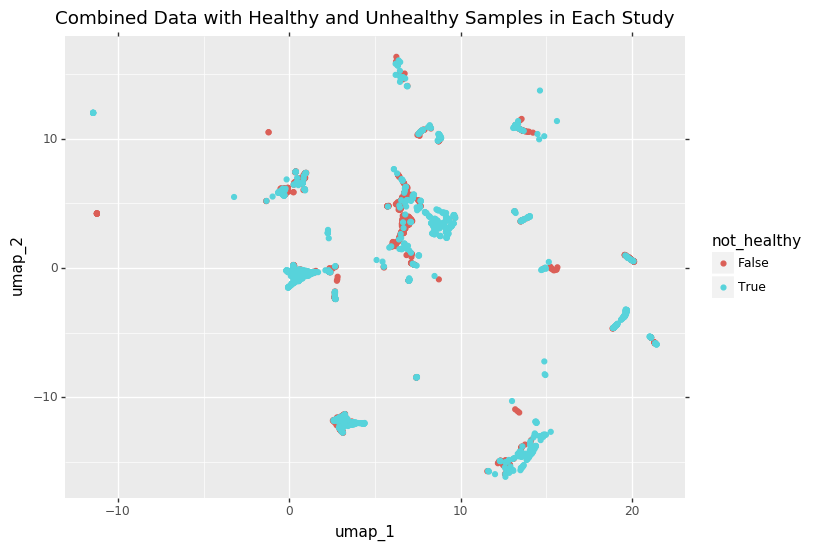

<ggplot: (-9223363246558823378)>

In [20]:
ggplot(two_type_df, aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('Combined Data with Healthy and Unhealthy Samples in Each Study')

### Conclusions

The plot of studies that have both healthy and unhealthy samples looks about the same as the plot with all studies. There does not appear to be a global separation between healthy and unhealthy samples, which is not surprising.

## Plot larger studies on their own

It is difficult to see whether there is a separation between healthy and unhealthy samples at the study level from the plots above. Plotting one study at a time will let us see whether such a division exists.

In [21]:
two_type_df['study'].value_counts().head()

SRP010181    514
SRP006574    236
SRP032775    231
SRP062966    117
SRP026042     84
Name: study, dtype: int64

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


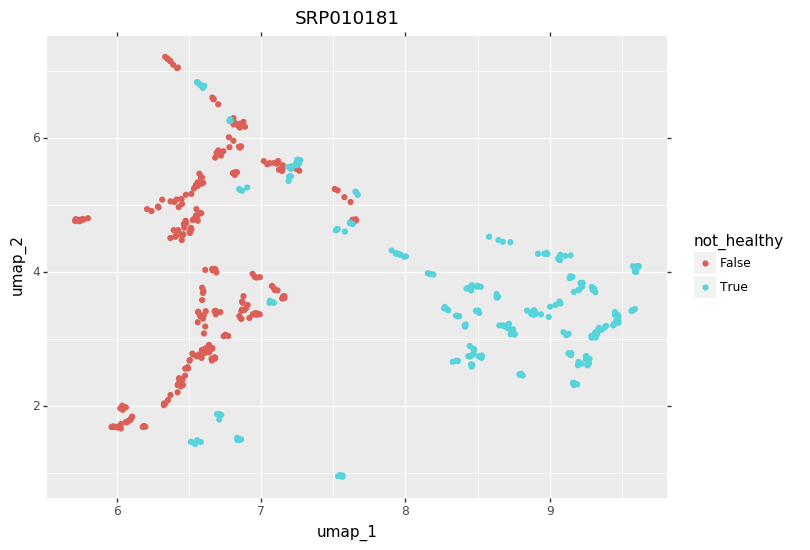

<ggplot: (8790296210068)>

In [22]:
ggplot(two_type_df[two_type_df['study'] == 'SRP010181'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP010181')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


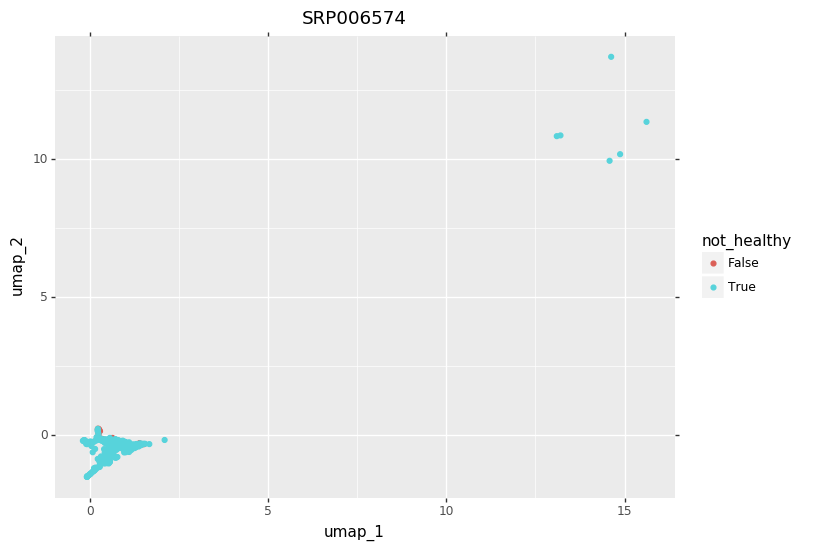

<ggplot: (-9223363246558540519)>

In [23]:
ggplot(two_type_df[two_type_df['study'] == 'SRP006574'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP006574')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


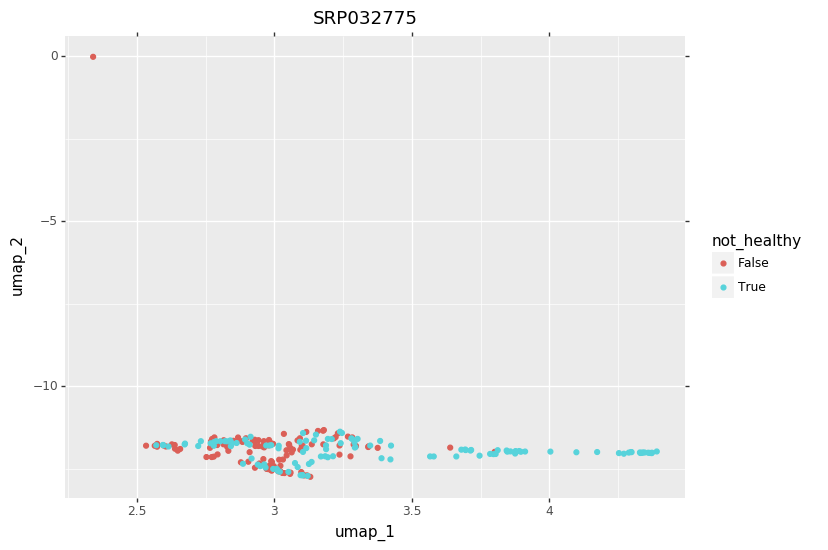

<ggplot: (8790296257989)>

In [24]:
ggplot(two_type_df[two_type_df['study'] == 'SRP032775'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP032775')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


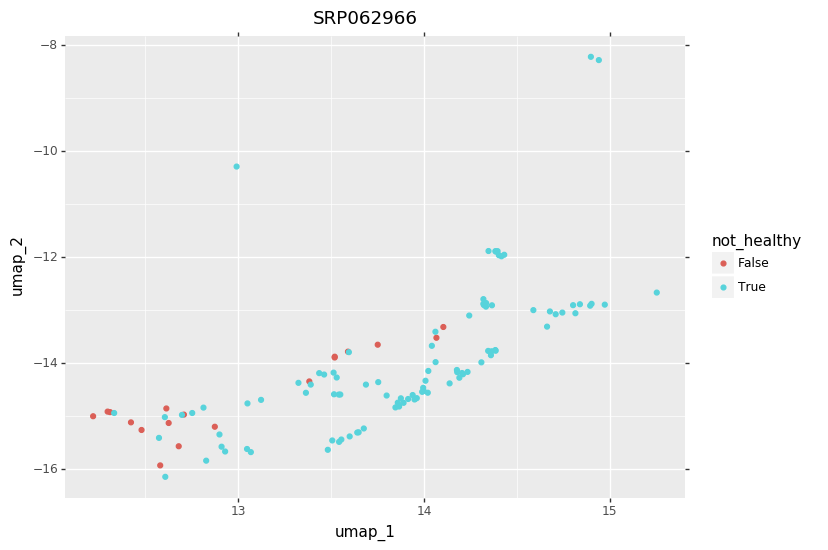

<ggplot: (8790296129558)>

In [25]:
ggplot(two_type_df[two_type_df['study'] == 'SRP062966'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP062966')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


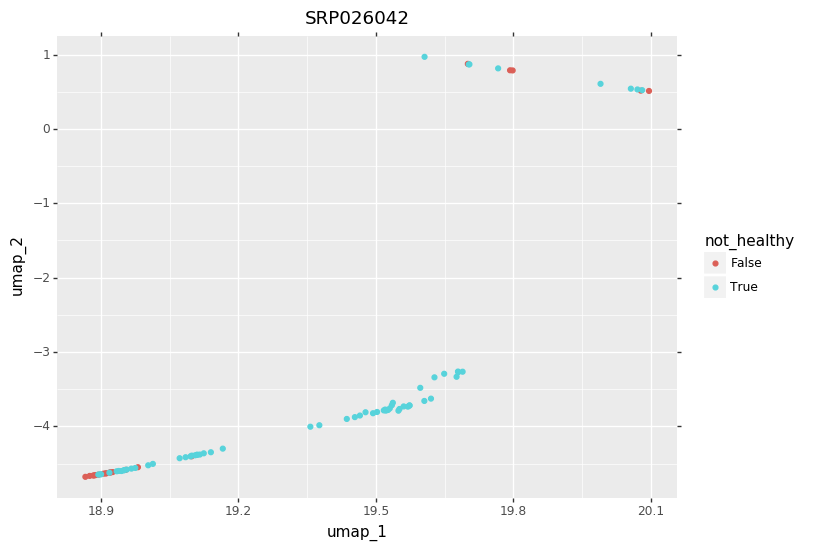

<ggplot: (-9223363246558670164)>

In [26]:
ggplot(two_type_df[two_type_df['study'] == 'SRP026042'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP026042')

### Conclusions

There is a large amount of heterogeneity both between different studies and between samples in the same study. In some cases there is a clear expression difference between healthy and unhealthy gene expression, as in the normal and tumor samples from SRP010181. This does not seem to be the case the majority of the time, however, as seen when comparing healthy patients to those with malaria in SRP032775.

## Plot samples embedded with UMAP after PLIER dimensionality reduction

In [27]:
def reduce_dimensionality(expression_df, Z_df):                                                     
    '''Convert a dataframe of gene expression data from gene space to the low                       
    dimensional representation specified by Z_df                                                    
                                                                                                    
    Arguments                                                                                       
    ---------                                                                                       
    expression_df: pandas.DataFrame                                                                 
        The expression dataframe to transform to the low dimensional representation                 
        specified by Z_df                                                                           
    Z_df: pandas.dataframe                                                                          
        The matrix that does the conversion from gene space to the low                              
        dimensional representation specified by Z_df                                                
                                                                                                    
    Returns                                                                                         
    -------                                                                                         
    reduced_matrix: numpy.array                                                                     
        The result from translating expression_df into the low dimensional representation           
        specified by Z_df                                                                           
    '''                                                                                             
                                                                                                    
    # Don't sort the genes in Z_df if they're already sorted                                        
    if not Z_df.index.is_monotonic:                                                                 
        # Ensure the gene symbols are in alphabetical order                                         
        Z_df = Z_df.sort_index()                                                                    
                                                                                                    
    expression_df = expression_df[expression_df.index.isin(Z_df.index)]                             
                                                                                                    
    expression_df = expression_df.sort_index()                                                      
                                                                                                    
    # Since the gene symbols are in alphabetical order and are identical between                    
    # the two dataframes, we can drop the labels and create a numpy matrix to be multiplied by Z       
    expression_matrix = expression_df.values                                                        
    Z_matrix = Z_df.values                                                                          
                                                                                                    
    reduced_matrix = numpy.matmul(expression_matrix.T, Z_matrix)                                    
                                                                                                    
    return reduced_matrix 

In [28]:
plier_df = pandas.read_csv('../data/plier_out/plier_32_Z.tsv', sep='\t')

combined_plier_reduced = reduce_dimensionality(combined_df, plier_df)
print(combined_plier_reduced.shape)

combined_plier_umap = reducer.fit_transform(combined_plier_reduced)
print(combined_plier_umap.shape)

combined_plier_umap_df = create_df_from_embedded_data(combined_plier_umap, combined_df)

combined_plier_umap_df['not_healthy'] = combined_plier_umap_df['sample'].isin(disease_df.columns)
combined_plier_umap_df.head()

(5428, 32)


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(5428, 2)


,umap_1,umap_2,sample,sample_id_only,study,not_healthy
0,-2.441598,1.534479,SRP025982.SRR1216040,SRR1216040,SRP025982,False
1,-2.441718,1.530575,SRP025982.SRR1216041,SRR1216041,SRP025982,False
2,-2.418566,1.494069,SRP025982.SRR1216039,SRR1216039,SRP025982,False
3,-2.428012,1.516762,SRP025982.SRR1216044,SRR1216044,SRP025982,False
4,-2.432509,1.511480,SRP025982.SRR1216043,SRR1216043,SRP025982,False


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


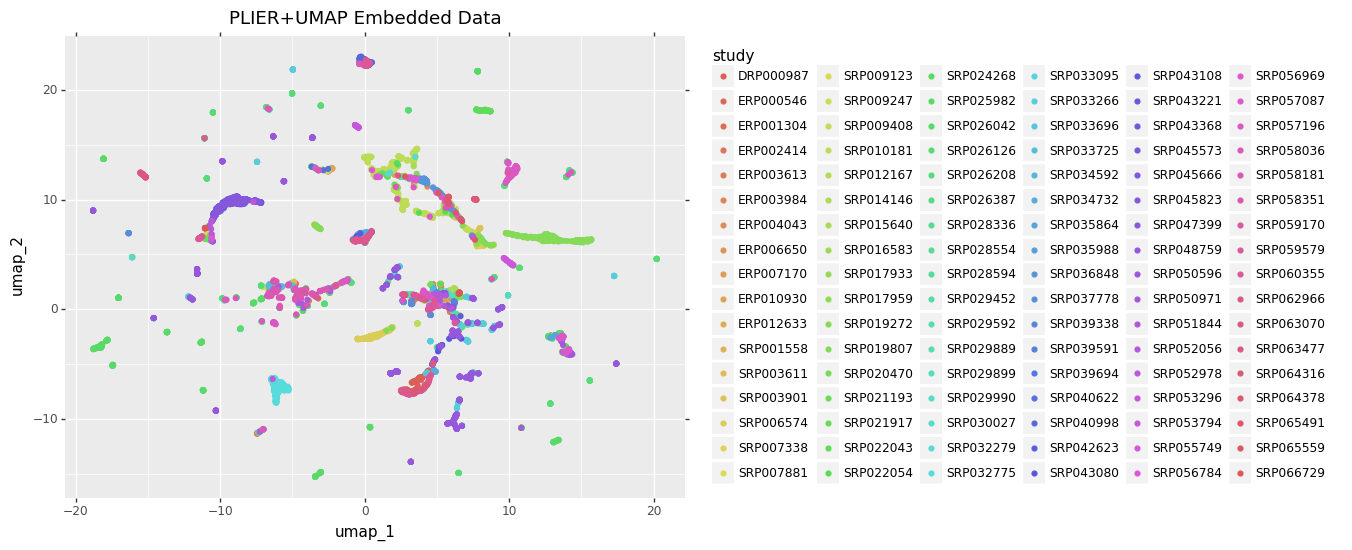

<ggplot: (8790296326306)>

In [29]:
ggplot(combined_plier_umap_df, aes(x='umap_1', y='umap_2', color='study')) +\
geom_point() +\
ggtitle('PLIER+UMAP Embedded Data')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


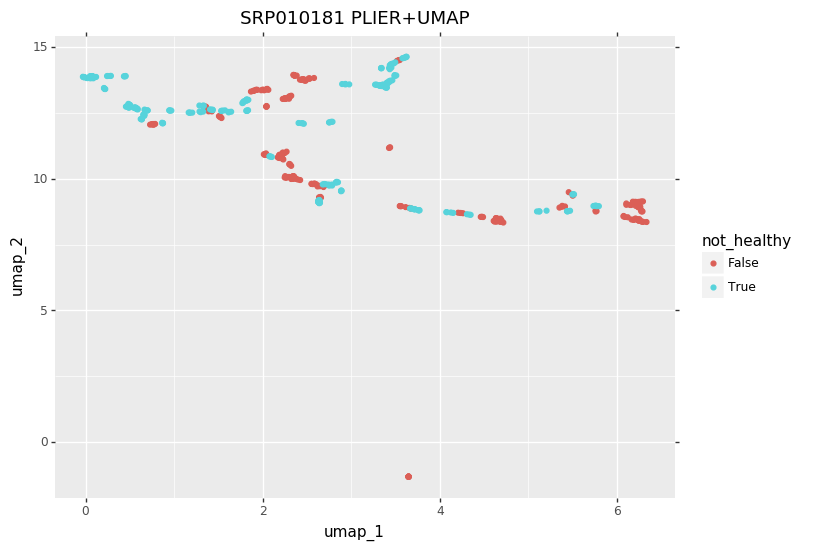

<ggplot: (-9223363246559034045)>

In [30]:

ggplot(combined_plier_umap_df[combined_plier_umap_df['study'] == 'SRP010181'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP010181 PLIER+UMAP')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


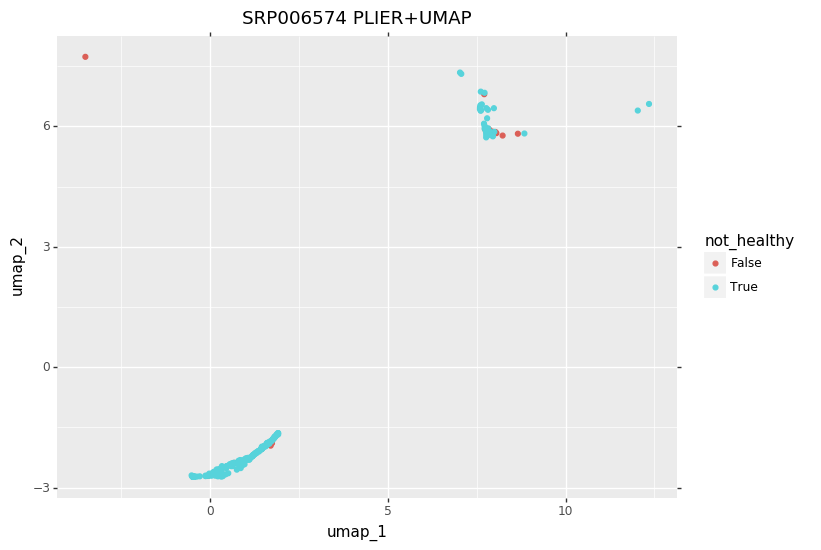

<ggplot: (8790295070840)>

In [31]:
ggplot(combined_plier_umap_df[combined_plier_umap_df['study'] == 'SRP006574'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP006574 PLIER+UMAP')

/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


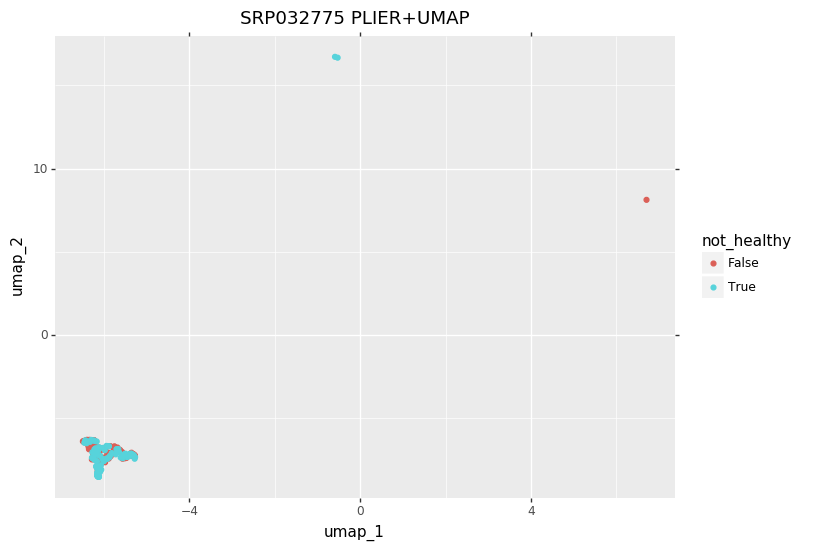

<ggplot: (8790299508407)>

In [32]:
ggplot(combined_plier_umap_df[combined_plier_umap_df['study'] == 'SRP032775'], aes(x='umap_1', y='umap_2', color='not_healthy')) +\
geom_point() +\
ggtitle('SRP032775 PLIER+UMAP')

In [33]:
healthy_plier_reduced = reduce_dimensionality(healthy_df, plier_df)
print(healthy_plier_reduced.shape)

healthy_plier_umap = reducer.fit_transform(healthy_plier_reduced)
print(healthy_plier_umap.shape)

healthy_plier_umap_df = create_df_from_embedded_data(healthy_plier_umap, healthy_df)

healthy_plier_umap_df.head()

(3155, 32)


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(3155, 2)


,umap_1,umap_2,sample,sample_id_only,study
0,-13.813628,-1.256980,SRP025982.SRR1216040,SRR1216040,SRP025982
1,-13.801318,-1.287217,SRP025982.SRR1216041,SRR1216041,SRP025982
2,-13.835171,-1.222139,SRP025982.SRR1216039,SRR1216039,SRP025982
3,-13.806119,-1.270977,SRP025982.SRR1216044,SRR1216044,SRP025982
4,-13.791080,-1.269545,SRP025982.SRR1216043,SRR1216043,SRP025982


/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/ben/anaconda3/envs/brdnet/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


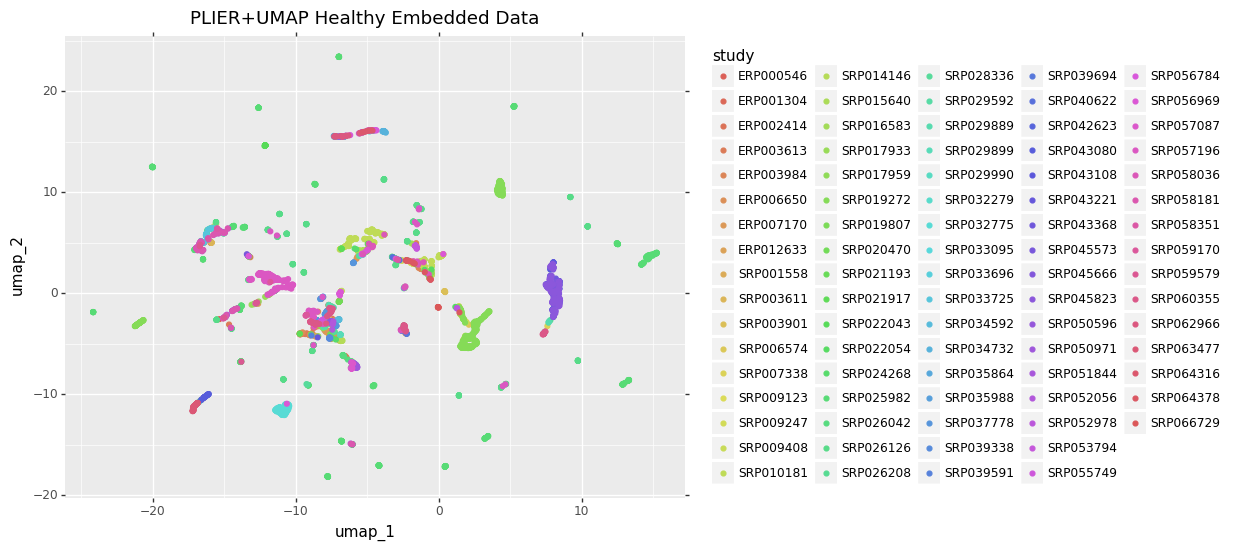

<ggplot: (8790296654333)>

In [34]:
ggplot(healthy_plier_umap_df, aes(x='umap_1', y='umap_2', color='study')) +\
geom_point() +\
ggtitle('PLIER+UMAP Healthy Embedded Data')

### Conclusions

At least in UMAP space, PLIER doesn't seem to be a help separate healthy and unhealthy expression